In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

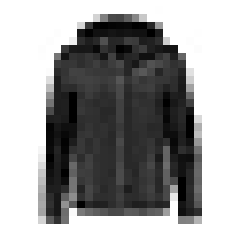

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [ ]:
model.add(keras.layers.Dense(300,activation="relu"))

In [ ]:
model.add(keras.layers.Dense(100,activation="relu"))

In [ ]:
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights,biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.07261434,  0.02725866, -0.0335589 , ..., -0.0511154 ,
         0.01511313, -0.00939067],
       [ 0.02132278, -0.03876775,  0.05061547, ..., -0.01264489,
        -0.01927307,  0.0307259 ],
       [ 0.01425269, -0.03287392,  0.04896151, ..., -0.02998355,
        -0.03307294,  0.06554498],
       ...,
       [ 0.05325447, -0.01964618,  0.06555091, ..., -0.03740433,
        -0.07130059,  0.03481504],
       [ 0.00920313, -0.01284306,  0.01046308, ..., -0.00280898,
         0.03468267, -0.02143488],
       [ 0.07387696,  0.03116337,  0.06759889, ...,  0.00654481,
        -0.04265129, -0.07275656]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7205 - accuracy: 0.7647 - val_loss: 0.5004 - val_accuracy: 0.8370
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4907 - accuracy: 0.8283 - val_loss: 0.4646 - val_accuracy: 0.8424
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4452 - accuracy: 0.8447 - val_loss: 0.4114 - val_accuracy: 0.8642
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4179 - accuracy: 0.8541 - val_loss: 0.3962 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3959 - accuracy: 0.8601 - val_loss: 0.3921 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3806 - accuracy: 0.8649 - val_loss: 0.3752 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3663 - accuracy: 0.8698 - val_loss: 0.3619 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

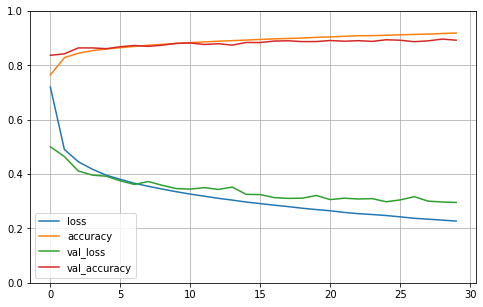

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8847


[0.3259446918964386, 0.8847000002861023]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 163ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_prob = model.predict(X_new, verbose=0) 
predicted = y_prob.argmax(axis=-1)

In [ ]:
import numpy as np

np.array(class_names)[predicted]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

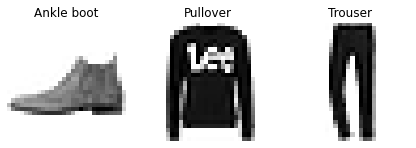

In [ ]:
from matplotlib.gridspec import tight_layout
plt.figure(figsize=(7.2,2.4))
for index,image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image,cmap="binary",interpolation="nearest")
  plt.axis('off')
  plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.savefig("fashion_mnist_images_plot",tight_layout=False)
plt.show()